In [ ]:
import re
import sys
import warnings
import pandas as pd
from pandasql import sqldf
# Ignore all warnings
warnings.filterwarnings("ignore")
import os
import pyodbc
import pandas as pd
import pandera as pa
import csv
#from bs4 import BeautifulSoup
#from pandera import DataFrameSchema,Column, Check, Index, MultiIndex
#import sqlalchemy;
from os import environ;
pd.set_option('display.max_columns', None)
dirpath = "./"

# Check if directory exists
if not os.path.exists(dirpath):
    raise FileNotFoundError(f"The directory {dirpath} does not exist.")
else:
    print(f"The directory {dirpath} exists.")
    # List all files in the directory
files_in_dir = os.listdir(dirpath)
print("Files in directory:", files_in_dir)
all_filename = 'Counties_Percapita_Formatted.csv'
singlefamily_filename = 'Counties_Percapita_FormattedZip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv.csv'
ThreeBedRoom_filename = 'Counties_Percapita_FormattedZip_zhvi_uc_ThreeBedRoom_tier_0.33_0.67_sm_sa_month.csv.csv'
threebed_filename = 'Counties_Percapita_FormattedZip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv'
twobed_filename = 'Counties_Percapita_FormattedZip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv'
all_filepath = os.path.join(dirpath, all_filename)
allhomes_df = pd.read_csv(all_filepath, header=0)  # Read without headers

sf_filepath = os.path.join(dirpath, singlefamily_filename)
sf_df = pd.read_csv(sf_filepath, header=0)  # Read without headers

condo_filepath = os.path.join(dirpath, condo_filename)
condo_df = pd.read_csv(condo_filepath, header=0)  # Read without headers
threebed_filepath = os.path.join(dirpath, threebed_filename)
threebed_df = pd.read_csv(threebed_filepath, header=0)  # Read without headers
twobed_filepath = os.path.join(dirpath, twobed_filename)
twobed_df = pd.read_csv(twobed_filepath, header=0)  # Read without headers

The directory C:\Users\req92163\OneDrive - Mutual of Omaha\DSCI8950\DS_2025_TeamE\data_files exists.
Files in directory: ['cfips_location.csv', 'Counties_Percapita_Formatted.csv', 'Counties_Percapita_FormattedZipcode_zhvi_sfcondo_tier.csv.csv', 'Counties_Percapita_FormattedZip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv', 'Counties_Percapita_FormattedZip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv', 'Counties_Percapita_FormattedZip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv.csv', 'Counties_Percapita_FormattedZip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv.csv', 'percapital_Fmatted_IncomeZipcode_zhvi_sfcondo_tier.csv.csv', 'percapital_Fmatted_IncomeZip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv', 'percapital_Fmatted_IncomeZip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.csv', 'percapital_Fmatted_IncomeZip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv.csv', 'percapital_Fmatted_IncomeZip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_m

In [ ]:
twobed_df.rename(columns={    
    'HouseValue': 'AnnualValue_TwoBedRoom',
    'prev_HouseValue': 'Previous_AnnualValue_TwoBedRoom',
    'annual_increase': 'Annual_Increase_TwoBedRoom',
    'BasePrice': '5Year_BasePrice_TwoBedRoom',
    'increase_base_pct': '5Year_Percent_Increase_TwoBedRoom',
    'Rank_Annual': 'Annual_Rank_TwoBedRoom',
    'annual_value_category': 'Annual_Value_Category_TwoBedRoom'
}, inplace=True)
#twobed_df.columns
threebed_df.rename(columns={    
    'HouseValue': 'AnnualValue_ThreeBedRoom',
    'prev_HouseValue': 'Previous_AnnualValue_ThreeBedRoom',
    'annual_increase': 'Annual_Increase_ThreeBedRoom',
    'BasePrice': '5Year_BasePrice_ThreeBedRoom',
    'increase_base_pct': '5Year_Percent_Increase_ThreeBedRoom',
    'Rank_Annual': 'Annual_Rank_ThreeBedRoom',
    'annual_value_category': 'Annual_Value_Category_ThreeBedRoom'
}, inplace=True)
#threebed_df.columns
allhomes_df.rename(columns={    
    'HouseValue': 'AnnualValue_AllHomes',
    'prev_HouseValue': 'Previous_AnnualValue_AllHomes',
    'annual_increase': 'Annual_Increase_AllHomes',
    'BasePrice': '5Year_BasePrice_AllHomes',
    'increase_base_pct': '5Year_Percent_Increase_AllHomes',
    'Rank_Annual': 'Annual_Rank_AllHomes',
    'annual_value_category': 'Annual_Value_Category_AllHomes'
}, inplace=True)
#allhomes_df.columns
sf_df.rename(columns={    
    'HouseValue': 'AnnualValue_SingleFamily',
    'prev_HouseValue': 'Previous_AnnualValue_SingleFamily',
    'annual_increase': 'Annual_Increase_SingleFamily',
    'BasePrice': '5Year_BasePrice_SingleFamily',
    'increase_base_pct': '5Year_Percent_Increase_SingleFamily',
    'Rank_Annual': 'Annual_Rank_SingleFamily',
    'annual_value_category': 'Annual_Value_Category_SingleFamily'
}, inplace=True)
#sf_df.columns
condo_df.rename(columns={    
    'HouseValue': 'AnnualValue_Condo',
    'prev_HouseValue': 'Previous_AnnualValue_Condo',
    'annual_increase': 'Annual_Increase_Condo',
    'BasePrice': '5Year_BasePrice_Condo',
    'increase_base_pct': '5Year_Percent_Increase_Condo',
    'Rank_Annual': 'Annual_Rank_Condo',
    'annual_value_category': 'Annual_Value_Category_Condo'
}, inplace=True)
condo_df.columns

Index(['CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng',
       'Year', '5Year_BasePrice_Condo', 'AnnualValue_Condo',
       'Previous_AnnualValue_Condo', '5Year_Percent_Increase_Condo',
       'Annual_Increase_Condo', 'Rank_Annual_Condo',
       'Annual_Value_Category_Condo', 'Personal_Income_Raise',
       'Population_Raise', 'Percapita_Income_Raise'],
      dtype='object')

In [ ]:
# Initialize merged_df with allhomes_df
merged_df = allhomes_df[['CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng', 'Year', 
                         'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise', 
                         '5Year_BasePrice_AllHomes', 'AnnualValue_AllHomes', 'Previous_AnnualValue_AllHomes', 
                         '5Year_Percent_Increase_AllHomes', 'Annual_Increase_AllHomes', 'Annual_Rank_AllHomes', 
                         'Annual_Value_Category_AllHomes']].copy()
# Select only 'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise' columns from allhomes_df
merged_df = merged_df[['CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng', 'Year', 
                       'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise', 
                       '5Year_BasePrice_AllHomes', 'AnnualValue_AllHomes', 'Previous_AnnualValue_AllHomes', 
                       '5Year_Percent_Increase_AllHomes', 'Annual_Increase_AllHomes', 'Annual_Rank_AllHomes', 
                       'Annual_Value_Category_AllHomes']]
# Merge all dataframes on the specified keys
#keys = ['CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng', 'Year', 'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise']
keys = ['CountyName', 'StateName',  'Year']
merged_df = merged_df.merge(sf_df, on=keys, how='outer', suffixes=('', '_SingleFamily'))
merged_df = merged_df.merge(condo_df, on=keys, how='inner', suffixes=('', '_Condo'))
merged_df = merged_df.merge(threebed_df, on=keys, how='outer', suffixes=('', '_ThreeBedRoom'))
merged_df = merged_df.merge(twobed_df, on=keys, how='outer', suffixes=('', '_TwoBedRoom'))

merged_df.rename(columns={
    'CountyName': 'County',
    'StateName': 'State',
    'FIPS': 'FIPS_Code',
    'City': 'City_Name',
    'Metro': 'Metropolitan_Area',
    'lat': 'Latitude',
    'lng': 'Longitude',
    'Year': 'Year_Recorded',
    'Personal_Income_Raise': 'Personal_Income_Growth',
    'Population_Raise': 'Population_Growth',
    'Percapita_Income_Raise': 'Per_Capita_Income_Growth'
},inplace=True)
# Display the first few rows of the merged dataframe
# Initialize merged_df with allhomes_df
merged_df = allhomes_df[['CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng', 'Year', 
                         'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise', 
                         '5Year_BasePrice_AllHomes',  '5Year_Percent_Increase_AllHomes', 'AnnualValue_AllHomes', 'Previous_AnnualValue_AllHomes', 
                        'Annual_Increase_AllHomes', 'Annual_Rank_AllHomes', 
                         'Annual_Value_Category_AllHomes']].copy()

# Merge all dataframes on the specified keys
keys = ['CountyName', 'StateName',  'Year']
merged_df = merged_df.merge(sf_df[['CountyName', 'StateName',  'Year', 
                                   '5Year_BasePrice_SingleFamily','5Year_Percent_Increase_SingleFamily',  'AnnualValue_SingleFamily', 
                                   'Previous_AnnualValue_SingleFamily', 
                                   'Annual_Increase_SingleFamily', 'Annual_Rank_SingleFamily', 
                                   'Annual_Value_Category_SingleFamily']], on=keys, how='outer')

merged_df = merged_df.merge(condo_df[['CountyName', 'StateName',  'Year', 
                                      '5Year_BasePrice_Condo', '5Year_Percent_Increase_Condo', 'AnnualValue_Condo', 
                                      'Previous_AnnualValue_Condo', 
                                      'Annual_Increase_Condo', 'Annual_Rank_Condo', 
                                      'Annual_Value_Category_Condo']], on=keys, how='outer')

merged_df = merged_df.merge(threebed_df[['CountyName', 'StateName', 'Year', 
                                         '5Year_BasePrice_ThreeBedRoom','5Year_Percent_Increase_ThreeBedRoom',  'AnnualValue_ThreeBedRoom', 
                                         'Previous_AnnualValue_ThreeBedRoom', 
                                         'Annual_Increase_ThreeBedRoom', 'Annual_Rank_ThreeBedRoom', 
                                         'Annual_Value_Category_ThreeBedRoom']], on=keys, how='outer')

merged_df = merged_df.merge(twobed_df[['CountyName', 'StateName',  'Year', 
                                       '5Year_BasePrice_TwoBedRoom','5Year_Percent_Increase_TwoBedRoom',  'AnnualValue_TwoBedRoom', 
                                       'Previous_AnnualValue_TwoBedRoom', 
                                       'Annual_Increase_TwoBedRoom', 'Annual_Rank_TwoBedRoom', 
                                       'Annual_Value_Category_TwoBedRoom']], on=keys, how='outer')

merged_df.rename(columns={
    'CountyName': 'County',
    'StateName': 'State',
    'FIPS': 'FIPS_Code',
    'City': 'City_Name',
    'Metro': 'Metropolitan_Area',
    'lat': 'Latitude',
    'lng': 'Longitude',
    'Year': 'Year_Recorded',
    'Personal_Income_Raise': 'Personal_Income_Growth',
    'Population_Raise': 'Population_Growth',
    'Percapita_Income_Raise': 'Per_Capita_Income_Growth'
}, inplace=True)

# Reorder columns
merged_df = merged_df[column_order]

# Display the first few rows of the merged dataframe
merged_df.head(15)

,County,State,FIPS_Code,City_Name,Metropolitan_Area,Latitude,Longitude,Year_Recorded,Personal_Income_Growth,Population_Growth,Per_Capita_Income_Growth,AnnualValue_AllHomes,Previous_AnnualValue_AllHomes,Annual_Increase_AllHomes,5Year_BasePrice_AllHomes,5Year_Percent_Increase_AllHomes,Rank_Annual_AllHomes,Annual_Value_Category_AllHomes,AnnualValue_SingleFamily,Previous_AnnualValue_SingleFamily,Annual_Increase_SingleFamily,5Year_BasePrice_SingleFamily,5Year_Percent_Increase_SingleFamily,Rank_Annual_SingleFamily,Annual_Value_Category_SingleFamily,AnnualValue_Condo,Previous_AnnualValue_Condo,Annual_Increase_Condo,5Year_BasePrice_Condo,5Year_Percent_Increase_Condo,Rank_Annual_Condo,Annual_Value_Category_Condo,AnnualValue_ThreeBedRoom,Previous_AnnualValue_ThreeBedRoom,Annual_Increase_ThreeBedRoom,5Year_BasePrice_ThreeBedRoom,5Year_Percent_Increase_ThreeBedRoom,Rank_Annual_ThreeBedRoom,Annual_Value_Category_ThreeBedRoom,AnnualValue_TwoBedRoom,Previous_AnnualValue_TwoBedRoom,Annual_Increase_TwoBedRoom,5Year_BasePrice_TwoBedRoom,5Year_Percent_Increase_TwoBedRoom,Rank_Annual_TwoBedRoom,Annual_Value_Category_TwoBedRoom
0,ABBEVILLE,SC,NaN,Donalds,"Greenwood, SC",34.222695,-82.458727,2020,NaN,NaN,NaN,138137.000000,117403.000000,18.0,117403.000000,18.0,103.0,Above 15 Percent,136407.000000,115696.000000,18.0,115696.000000,18.0,102.0,Above 15 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136521.000000,116718.000000,17.0,116718.000000,17.0,85.5,Above 15 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABBEVILLE,SC,NaN,Donalds,"Greenwood, SC",34.222695,-82.458727,2021,NaN,NaN,NaN,162819.000000,138137.000000,18.0,117403.000000,39.0,538.5,Above 15 Percent,160577.000000,136407.000000,18.0,115696.000000,39.0,540.5,Above 15 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157712.000000,136521.000000,16.0,116718.000000,35.0,851.5,Above 15 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABBEVILLE,SC,45001.0,Donalds,"Greenwood, SC",34.222695,-82.458727,2022,7.8,0.0,7.9,183338.000000,162819.000000,13.0,117403.000000,56.0,285.0,Above 12 Percent,181376.000000,160577.000000,13.0,115696.000000,57.0,287.5,Above 12 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186346.000000,157712.000000,18.0,116718.000000,60.0,72.0,Above 15 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABBEVILLE,SC,45001.0,Donalds,"Greenwood, SC",34.222695,-82.458727,2023,2.2,0.3,1.9,181153.000000,183338.000000,-1.0,117403.000000,54.0,1828.0,2 Percent Decrease,179578.000000,181376.000000,-1.0,115696.000000,55.0,1828.5,2 Percent Decrease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195261.000000,186346.000000,5.0,116718.000000,67.0,701.0,Above 5 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABBEVILLE,SC,45001.0,Donalds,"Greenwood, SC",34.222695,-82.458727,2024,5.0,0.4,4.6,184911.000000,181153.000000,2.0,117403.000000,58.0,1709.0,Above 1 Percent,183180.000000,179578.000000,2.0,115696.000000,58.0,1718.0,Above 1 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203177.000000,195261.000000,4.0,116718.000000,74.0,1174.0,Above 3 Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ADA,ID,NaN,Star,"Boise City, ID",43.450841,-116.241035,2020,NaN,NaN,NaN,424153.000000,355784.733333,19.0,355784.733333,19.0,65.5,Above 15 Percent,426129.933333,357113.200000,19.0,357113.200000,19.0,68.0,Above 15 Percent,279064.500,242491.250,15.0,242491.25,15.0,22.5,No Increase,393318.666667,329725.866667,19.0,329725.866667,19.0,40.5,Above 15 Percent,324277.466667,269304.266667,20.0,269304.266667,20.0,77.0,Above 15 Percent
6,ADA,ID,NaN,Star,"Boise City, ID",43.450841,-116.241035,2021,NaN,NaN,NaN,560965.533333,424153.000000,32.0,355784.733333,58.0,33.0,Above 15 Percent,563613.466667,426129.933333,32.0,357113.200000,58.0,36.0,Above 15 Percent,381267.625,279064.500,37.0,242491.25,57.0,26.0,Above 15 Percent,517221.000000,393318.666667,32.0,329725.866667,57.0,40.0,Above 15 Percent,428172.533333,324277.466667,32.0,269304.266667,59.0,54.0,Above 15 Percent
7,ADA,ID,16001.0,Star,"Boise City, ID",43.450841,-116.241035,2022,15.6,3.0,12.3,545204.933333,560965.533333,-3.0,355784.733333,53.0,2123.0,4 Percent Decrease,547932.533333,563613.466667,-3.0,

In [102]:
# Sort the dataframe by 'State', 'County', and 'Year'
sorted_df = merged_df.sort_values(by=['State', 'County', 'Year_Recorded'])

# Write the sorted dataframe to a CSV file
sorted_df.to_csv(os.path.join(dirpath, 'zillow_combined_zhvi.csv'), index=False)

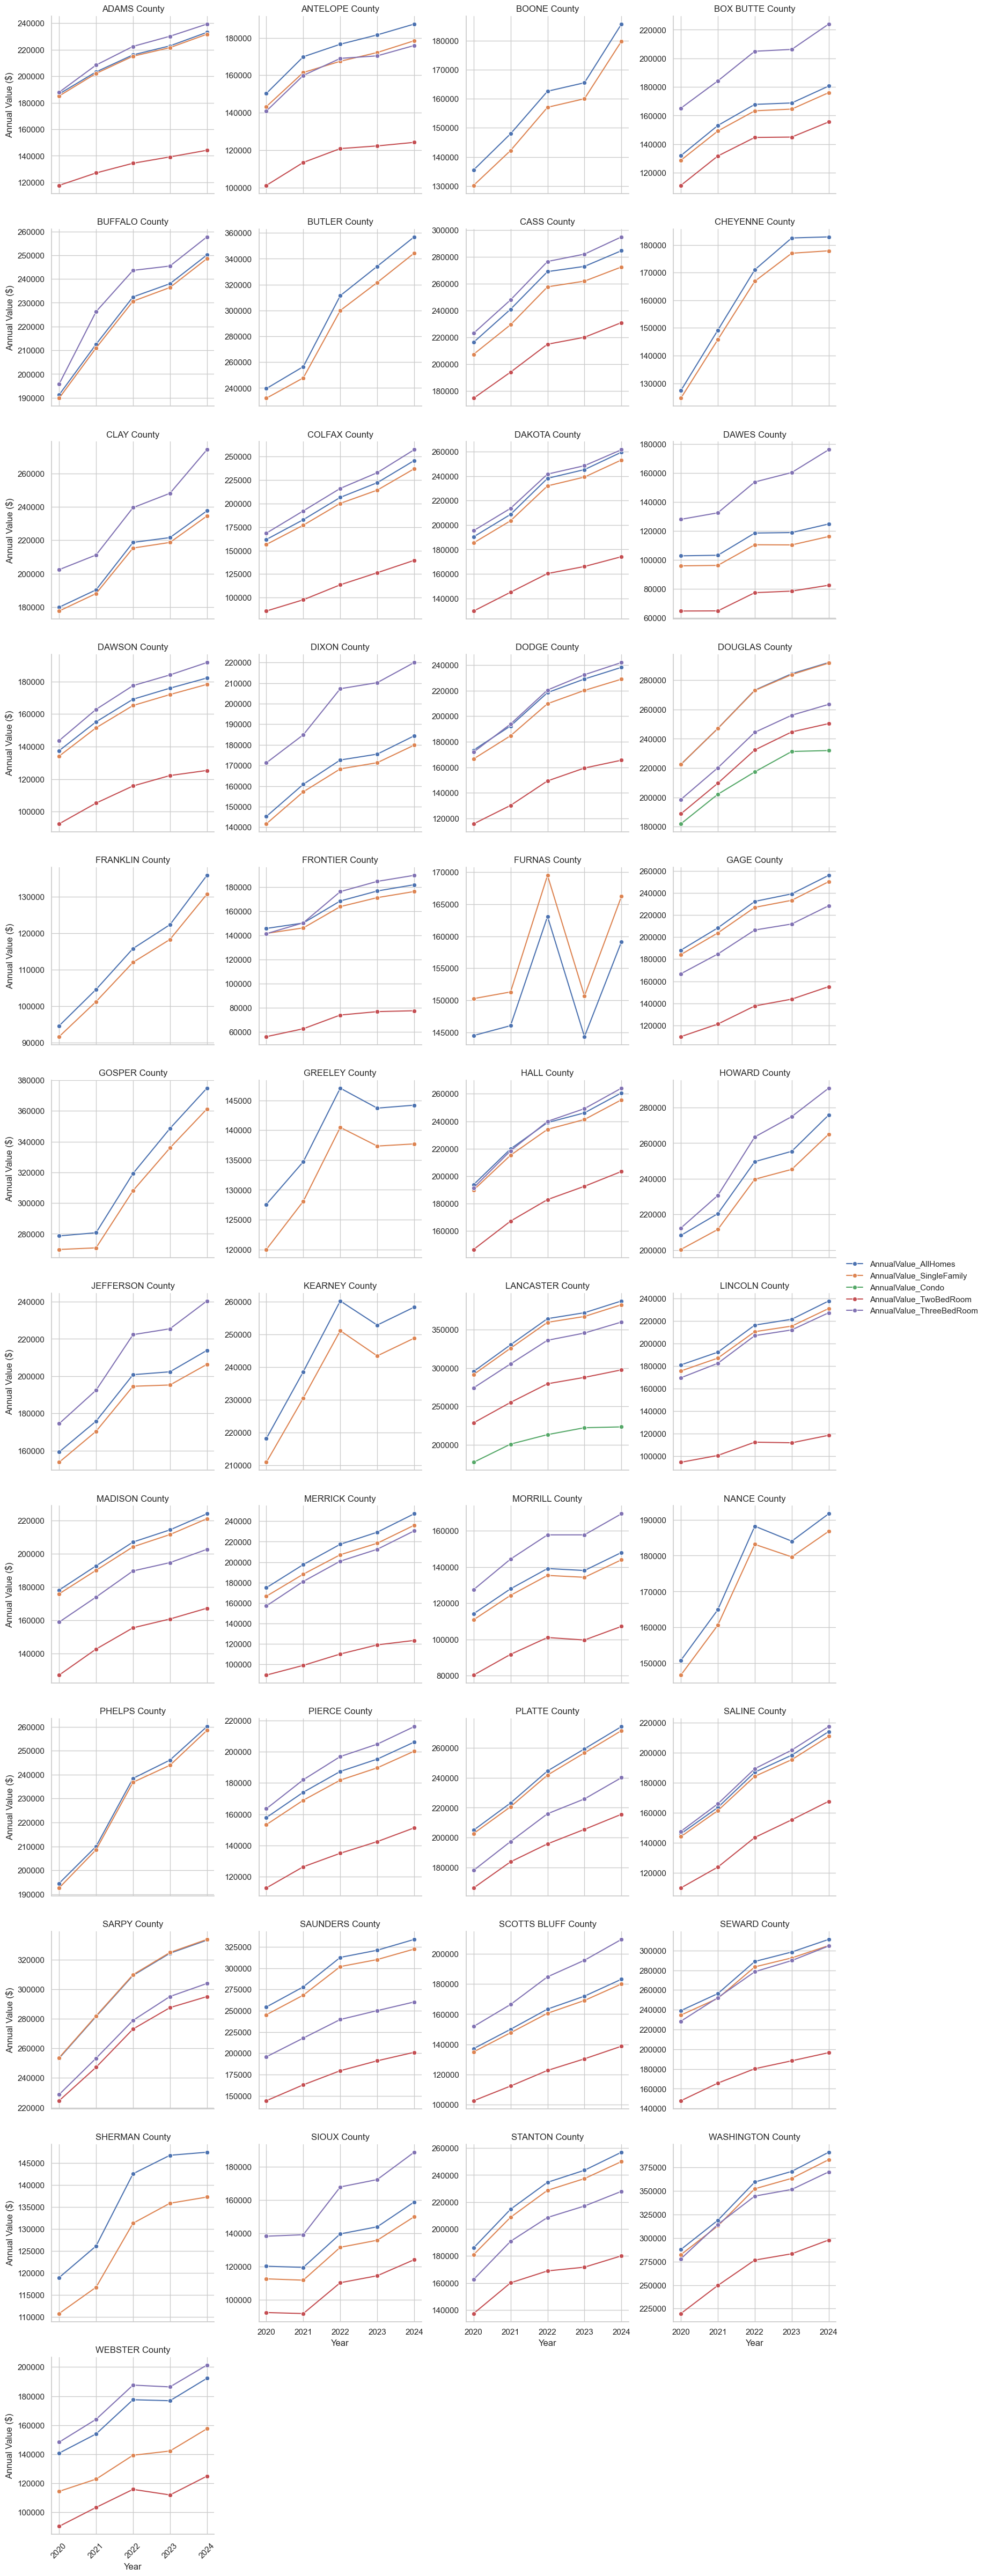

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter Nebraska data and relevant years
nebraska_df = merged_df[(merged_df['State'] == 'NE') & (merged_df['Year_Recorded'].between(2019, 2024))]

# Melt the dataframe to long format
nebraska_melted_df = nebraska_df.melt(id_vars=['Year_Recorded', 'County'], 
                                      value_vars=['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 
                                                  'AnnualValue_Condo', 'AnnualValue_TwoBedRoom', 'AnnualValue_ThreeBedRoom'],
                                      var_name='HomeType', value_name='AnnualValue')

# Convert Year to numeric (just in case it's not)
nebraska_melted_df['Year_Recorded'] = nebraska_melted_df['Year_Recorded'].astype(int)

# Set Seaborn style
sns.set(style="whitegrid")

# Create FacetGrid for county-wise visualization
g = sns.FacetGrid(nebraska_melted_df, col="County", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Year_Recorded", y="AnnualValue", hue="HomeType", marker="o")

# Adjust legends and labels
g.add_legend()
g.set_axis_labels("Year", "Annual Value ($)")
g.set_titles(col_template="{col_name} County")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


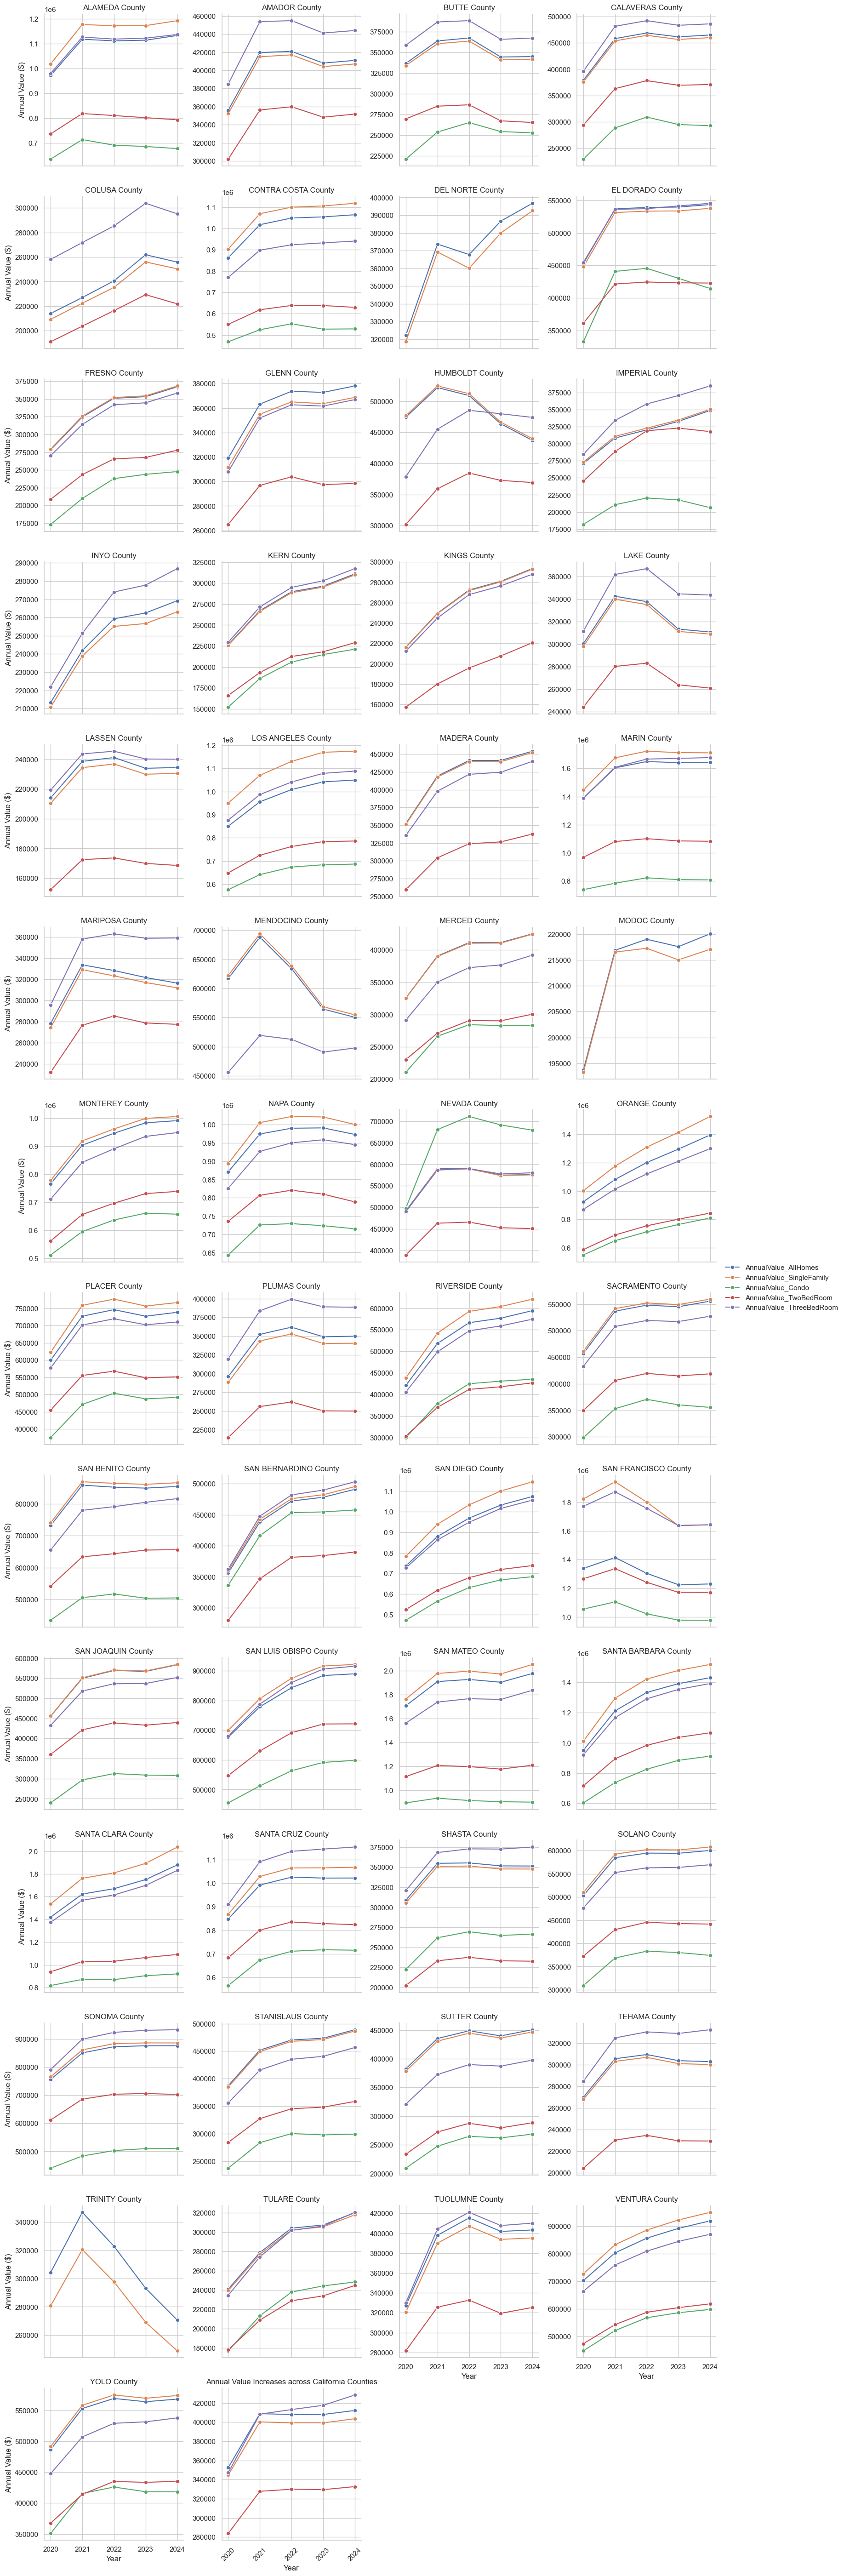

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter Nebraska data and relevant years
california_df = merged_df[(merged_df['State'] == 'CA') & (merged_df['Year_Recorded'].between(2019, 2024))]

# Melt the dataframe to long format
california_melted_df = california_df.melt(id_vars=['Year_Recorded', 'County'], 
                                      value_vars=['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 
                                                  'AnnualValue_Condo', 'AnnualValue_TwoBedRoom', 'AnnualValue_ThreeBedRoom'],
                                      var_name='HomeType', value_name='AnnualValue')

# Convert Year to numeric (just in case it's not)
california_melted_df['Year_Recorded'] = california_melted_df['Year_Recorded'].astype(int)

# Set Seaborn style
sns.set(style="whitegrid")

# Create FacetGrid for county-wise visualization
g = sns.FacetGrid(california_melted_df, col="County", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Year_Recorded", y="AnnualValue", hue="HomeType", marker="o")

# Adjust legends and labels
g.add_legend()
g.set_axis_labels("Year", "Annual Value ($)")
g.set_titles(col_template="{col_name} County")
plt.title("Annual Value Increases across California Counties")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


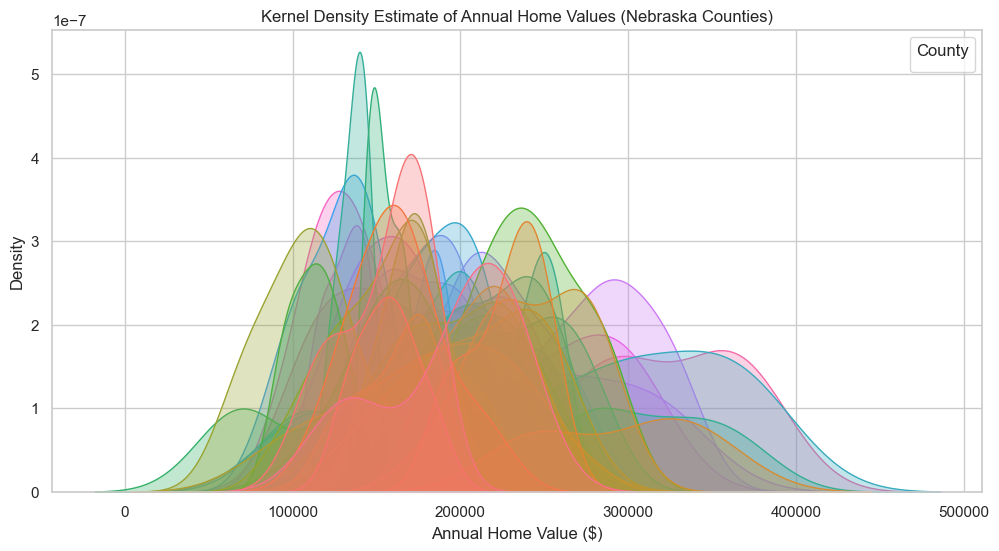

In [110]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=nebraska_melted_df, x="AnnualValue", hue="County", fill=True, alpha=0.3)

plt.title("Kernel Density Estimate of Annual Home Values (Nebraska Counties)")
plt.xlabel("Annual Home Value ($)")
plt.ylabel("Density")
plt.legend(title="County")
plt.show()

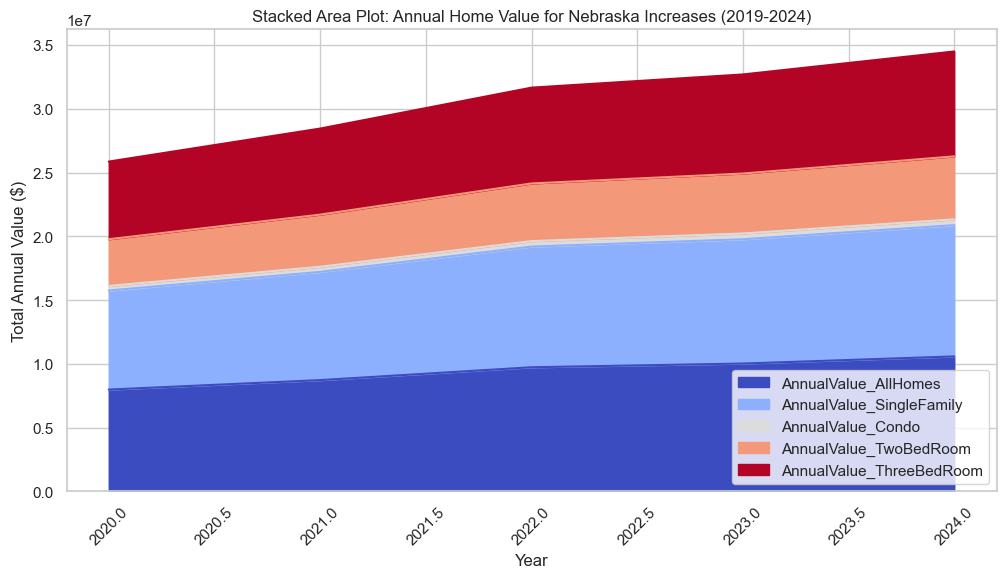

In [121]:
# Group data by Year and sum the values for each home type
area_data = nebraska_df.groupby('Year_Recorded')[['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 
                                                  'AnnualValue_Condo', 'AnnualValue_TwoBedRoom', 
                                                  'AnnualValue_ThreeBedRoom']].sum()

# Plot the stacked area plot
area_data.plot.area(stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Stacked Area Plot: Annual Home Value for Nebraska Increases (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Total Annual Value ($)")
plt.xticks(rotation=45)
plt.show()


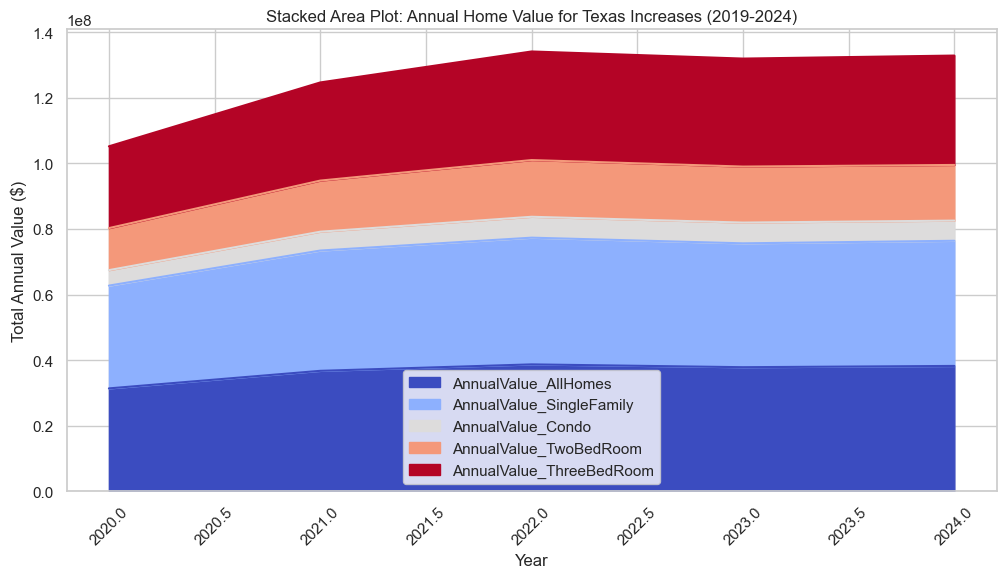

In [118]:
# Group data by Year and sum the values for each home type
texas_df = merged_df[(merged_df['State'] == 'TX') & (merged_df['Year_Recorded'].between(2019, 2024))]
area_data = texas_df.groupby('Year_Recorded')[['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 
                                                  'AnnualValue_Condo', 'AnnualValue_TwoBedRoom', 
                                                  'AnnualValue_ThreeBedRoom']].sum()

# Plot the stacked area plot
area_data.plot.area(stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Stacked Area Plot: Annual Home Value for Texas Increases (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Total Annual Value ($)")
plt.xticks(rotation=45)
plt.show()


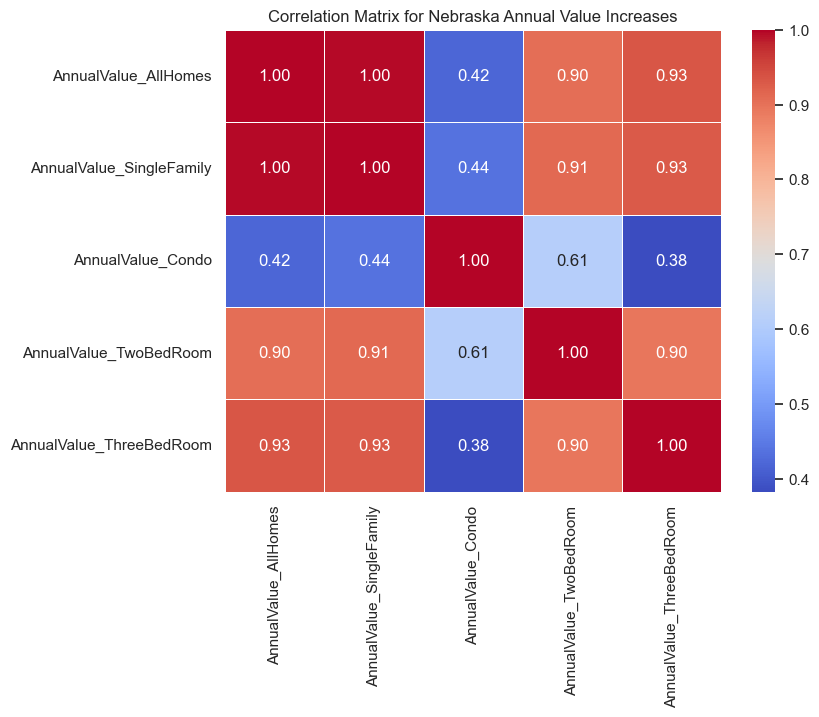

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with just the columns needed for the correlation matrix
comparison_df = nebraska_df[['AnnualValue_AllHomes', 'AnnualValue_SingleFamily', 
                             'AnnualValue_Condo', 'AnnualValue_TwoBedRoom', 'AnnualValue_ThreeBedRoom']]

# Calculate the correlation matrix
corr_matrix = comparison_df.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix for Nebraska Annual Value Increases")
plt.show()